In [1]:
### load packages

import os
from glob import glob
import pathlib

### reproducible file paths

### gbif packages
import pygbif.occurrences as occ
import pygbif.species as species
from getpass import getpass

### packages for unzipping and handling gbif data
import zipfile
import time

### deal with spatial data
import geopandas as gpd
import xrspatial

### deal with other types of data
import numpy as np
import pandas as pd
import rioxarray as rxr
import rioxarray.merge as rxrm

### indalid geometries
from shapely.geometry import MultiPolygon, Polygon

### visualizing
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

c:\Users\moenc\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# ### Make reproducible file paths

# data_dir = os.path.join(
#     ### home directory
#     pathlib.Path.home(),
    
#     ### eda directory
#     'earth-analytics',
#     'data',

#     ### Project dir
#     'hab_suit'
# )

# ### make the dir
# os.makedirs(data_dir, exist_ok=True)

In [6]:
### Make reproducible file paths
data_dir = os.path.join(
	### home directory
	pathlib.Path.home(),
	
	### eda directory
	'earth-analytics',
	'data',

	### Project dir
	'hab_suit'
)

### make the dir
os.makedirs(data_dir, exist_ok=True)

In [ ]:
%run make_directory.py # this isn't working... something about how I set up the .py function is wrong!

<Axes: >

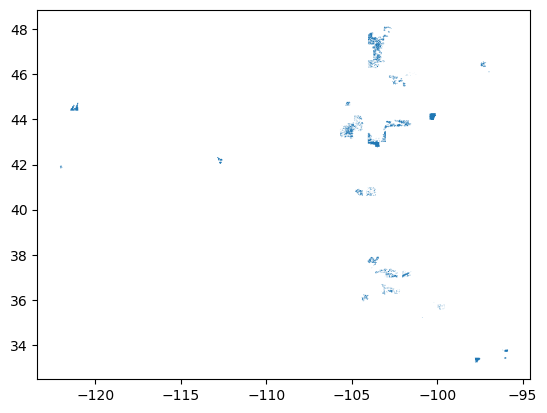

In [7]:
# Define info for grasslands download
grasslands_url = (
    "https://data.fs.usda.gov/geodata/edw/edw_resources/"
    "shp/S_USA.NationalGrassland.zip"
)
grasslands_dir = os.path.join(data_dir, 'grasslands')
os.makedirs(grasslands_dir, exist_ok=True)
grasslands_path = os.path.join(grasslands_dir, 'grasslands.shp')

# Only download once
if not os.path.exists (grasslands_path):
    grasslands_gdf = gpd.read_file(grasslands_url)
    grasslands_gdf.to_file(grasslands_path)

# Load from file
grasslands_gdf = gpd.read_file(grasslands_path)

# Check the data
grasslands_gdf.plot()

In [ ]:
# Print the full grasslands_gdf. Note the NATIONALGR column. 
grasslands_gdf

In [ ]:
# Define and print the boundary for the Pawnee National Grassland, with ESRI imagery as the background. 
# For future runs of this code on different study areas, simply replace the "NATIONALGR" value 
# on the first line below with the corresponding value for the new study area from the table above.

pawnee_gdf = grasslands_gdf[grasslands_gdf.NATIONALGR=='295523010328']
pawnee_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='Pawnee National Grassland',
    fill_color=None, line_color='black', line_width=1.5,
    frame_width=800
)

In [ ]:
%run plot_grassland.py

In [ ]:
plot_grassland(pawnee_gdf, grasslands_gdf)

In [ ]:
# Define and print the Comanche National Grassland boundary, with ESRI imagery as the background.

comanche_gdf = grasslands_gdf[grasslands_gdf.NATIONALGR=='295522010328']
comanche_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='Comanche National Grassland',
    fill_color=None, line_color='black', line_width=1.5,
    frame_width=800
)

In [ ]:
%store comanche_gdf pawnee_gdf